<a href="https://colab.research.google.com/github/kkamal2003/R_programming/blob/main/Assignment_R_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Create a file that contains 1000 lines of random strings.


In [16]:
# Generate a random string
generate_random_string <- function(length) {
  letters <- sample(letters, length, replace = TRUE)
  return(paste(letters, collapse = ""))
}

# Generate 1000 lines of random strings
lines <- replicate(1000, generate_random_string(10))

# Write the lines to a file
writeLines(lines, "random_strings.txt")


Q2. Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200]. Perform 
the following operations:

(i) Replace all the values with NA in the dataset defined between [10, 60]. Print the count of number 
rows having missing values.

(ii) Replace all the NA values with the average of the column value. 

(iii) Find the Pearson correlation among all the columns and plot heat map. Also select those columns 
having correlation <=0.7.

(iv) Normalize all the values in the dataset between 0 and 10.

(v) Replace all the values in the dataset with 1 if value <=0.5 else with 0

In [ ]:
# Set the dimensions of the dataset
num_rows <- 100
num_cols <- 30

# Create a matrix of random values between 1 and 200
random_matrix <- matrix(sample(1:200, num_rows*num_cols, replace=TRUE), nrow=num_rows, ncol=num_cols)

# Convert the matrix to a data frame
random_dataset <- as.data.frame(random_matrix)

# Print the dataset
print(random_dataset)


     V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19
1     6  75 115  10   2 186 195  16 141  64 188  94 168 187  17 156 123  67 103
2    50  97 197 103 152  73 143  13 172  46  10  35  59 154 172  65  64  67 161
3   169 169  39  62 137 144 106 158  33 187 164 149 180 114 141  51 185  41   2
4    16  50   1 119  37   5 151  12 149  86  60  14 196   6 109  59 153 185  21
5   116  30   6   7 162  22 155  62 179 134  36 102   1 143  15 125 151   2 183
6    52  37 136  33 178 139  38 151 185 127 129  32  41 187  46  41  14 192 179
7     4 140  98 163 122 109  79 164 159 197 114 163  87  62  68 177  68  75  42
8    66 127  50 121 174  38 198 142  94 117  94 153   9   1 112  12  67 196   9
9    47 171 115   4 108 169  39 134 119   8 196  61 192  29 138 119  88 167 125
10  139  57 117 142 170 127  34  24 128  97  80 117 110  21 121 118 149 117   2
11   20  53 172 186 175 185  39 191 124  19   7 127  39 153  18  11  93  78  74
12   73  17   5  75 179 162  50   5 183 

In [ ]:
# Replace values between 10 and 60 with NA
random_dataset[random_dataset >= 10 & random_dataset <= 60] <- NA

# Count rows with missing values
missing_rows_count <- sum(rowSums(is.na(random_dataset)) > 0)

# Print the count
print(missing_rows_count)

[1] 100


In [ ]:
random_dataset <- apply(random_dataset, 2, function(col) {
  col[is.na(col)] <- mean(col, na.rm = TRUE)
  return(col)
})

# Count rows with missing values
missing_rows_count <- sum(rowSums(is.na(random_dataset)) > 0)


              V1           V2          V3           V4            V5
V1   1.000000000  0.075648354 -0.08133505 -0.042937305  0.2155136495
V2   0.075648354  1.000000000  0.06043802 -0.103106018  0.1159170122
V3  -0.081335049  0.060438025  1.00000000  0.181027898 -0.1049301693
V4  -0.042937305 -0.103106018  0.18102790  1.000000000  0.0564408071
V5   0.215513649  0.115917012 -0.10493017  0.056440807  1.0000000000
V6   0.108640093 -0.002448389 -0.01542798 -0.004799185 -0.1367412388
V7   0.033752832  0.024127495 -0.22970759 -0.232420483  0.0630943155
V8  -0.077891147  0.170368236  0.18313906 -0.005006742 -0.0835765086
V9  -0.095074764 -0.011125151 -0.13752356 -0.177684868  0.0598884336
V10 -0.088780882  0.032374641  0.08289232 -0.027349604 -0.1092666344
V11  0.007055333  0.091195175 -0.04239947 -0.152270390 -0.2427713430
V12  0.015524623 -0.005891297  0.05614139 -0.046585716  0.0635203121
V13  0.149564226  0.080245183  0.01671091  0.105689958 -0.0771421273
V14 -0.076394459  0.101741295  0.0

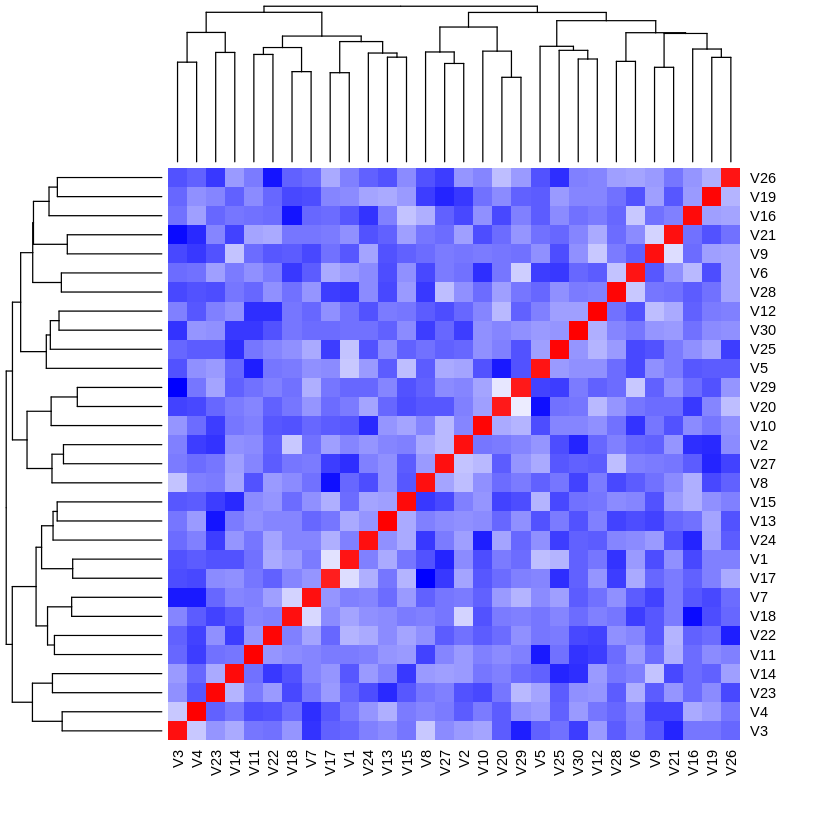

In [ ]:
# Calculate Pearson correlation matrix
cor_matrix <- cor(random_dataset, use = "complete.obs")
print(cor_matrix)

# Select columns with correlation <= 0.7
cor_threshold <- 0.7
selected_columns <- colnames(cor_matrix)[apply(cor_matrix, 2, function(col) any(col <= cor_threshold))]

# Print selected columns
print(selected_columns)
# Plot heatmap
heatmap(cor_matrix, col = colorRampPalette(c("blue", "white", "red"))(100))


In [ ]:
# Normalize dataset between 0 and 10
normalized_dataset <- apply(random_dataset, 2, function(col) {
  (col - min(col, na.rm = TRUE)) / (max(col, na.rm = TRUE) - min(col, na.rm = TRUE)) * 10
})

# Print normalized dataset
print(normalized_dataset)


               V1         V2         V3         V4         V5          V6
  [1,]  0.1052632  3.7435897  5.7868020  6.2199222  0.0000000  9.34010152
  [2,]  6.0851801  4.8717949  9.9492386  5.1269036  7.8947368  3.60406091
  [3,]  8.6842105  8.5641026  5.7367085  3.0456853  7.1052632  7.20812183
  [4,]  6.0851801  6.1834597  0.0000000  5.9390863  6.3796491  0.15228426
  [5,]  5.8947368  6.1834597  0.2538071  0.2538071  8.4210526  5.91472081
  [6,]  6.0851801  6.1834597  6.8527919  6.2199222  9.2631579  6.95431472
  [7,]  0.0000000  7.0769231  4.9238579  8.1725888  6.3157895  5.43147208
  [8,]  3.2631579  6.4102564  5.7367085  6.0406091  9.0526316  5.91472081
  [9,]  6.0851801  8.6666667  5.7868020  0.1015228  5.5789474  8.47715736
 [10,]  7.1052632  6.1834597  5.8883249  7.1065990  8.8421053  6.34517766
 [11,]  6.0851801  6.1834597  8.6802030  9.3401015  9.1052632  9.28934010
 [12,]  3.6315789  6.1834597  0.2030457  3.7055838  9.3157895  8.12182741
 [13,]  7.2105263  8.5641026  4.365482

In [ ]:
# Replace values in dataset
replaced_dataset <- ifelse(random_dataset <= 0.5, 1, 0)

# Print replaced dataset
print(replaced_dataset)


       V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20
  [1,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0
  [2,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0
  [3,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0
  [4,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0
  [5,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0
  [6,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0
  [7,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0
  [8,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0
  [9,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0
 [10,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0
 [11,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0
 [12,]  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   

Q3. Create a random dataset of 500 rows and 10 columns. 

Columns 1 to 4 are defined between [-10, 10]; 

Columns 5 to 8 are defined between [10, 20]; 

Columns 9 to 10 are defined between [-100, 100]. 

Apply following clustering algorithms; determine the optimal number of clusters and plot distance metric 
graph using each algorithm.

(i) K-Mean clustering
(ii) Hierarchical clustering

In [5]:
# Set the dimensions of the dataset
num_rows <- 500
num_cols <- 10

# Create a matrix of random values
random_matrix <- matrix(nrow = num_rows, ncol = num_cols)

# Set the range for each column
column_ranges <- list(c(-10, 10), c(-10, 10), c(-10, 10), c(-10, 10),
                      c(10, 20), c(10, 20), c(10, 20), c(10, 20),
                      c(-100, 100), c(-100, 100))

# Fill the matrix with random values within the specified ranges
for (i in 1:num_cols) {
  random_matrix[, i] <- runif(num_rows, column_ranges[[i]][1], column_ranges[[i]][2])
}

# Convert the matrix to a data frame
random_dataset <- as.data.frame(random_matrix)




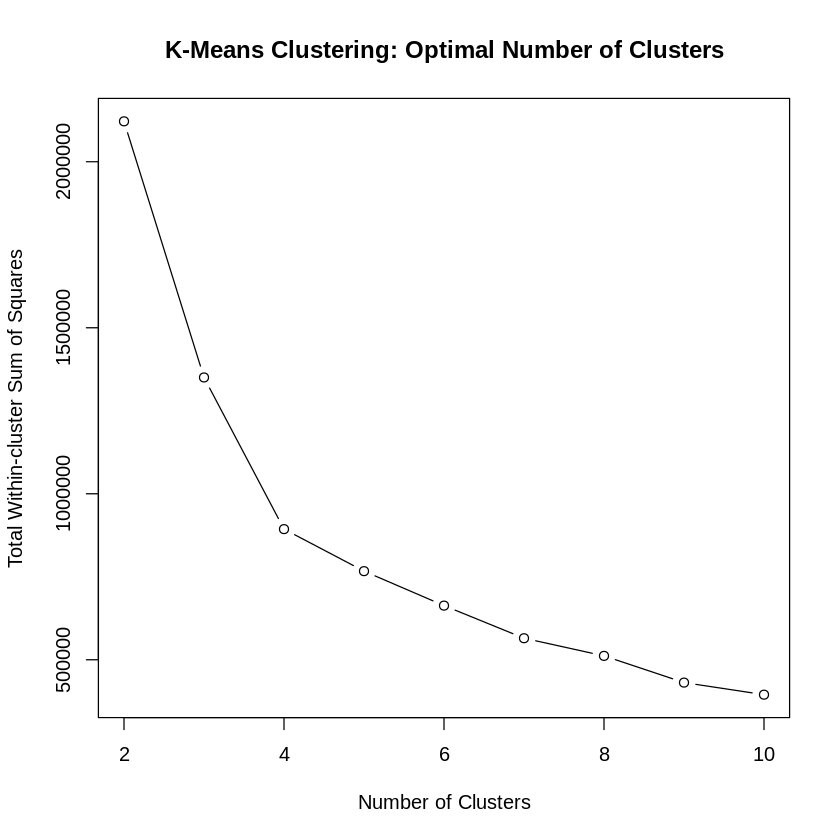

In [6]:
# K-Means clustering
library(cluster)

# Determine the optimal number of clusters using the elbow method
wss <- sapply(2:10, function(k) {
  kmeans_res <- kmeans(random_dataset, centers = k)
  kmeans_res$tot.withinss
})

# Plot the within-cluster sum of squares (WSS) against the number of clusters
plot(2:10, wss, type = "b", xlab = "Number of Clusters",
     ylab = "Total Within-cluster Sum of Squares",
     main = "K-Means Clustering: Optimal Number of Clusters")



             1          2          3          4          5          6
2   177.978256                                                       
3   113.851078 133.008354                                            
4    34.234808 185.382971 133.675939                                 
5   125.194462 112.518961 160.817022 116.194331                      
6    39.874606 195.731527 142.905996  16.590902 124.313493           
7    66.286399 122.808021 111.122064  67.567973  65.039676  78.170198
8   103.356830 101.090273  40.412292 120.704318 126.033780 131.036977
9   202.480711  71.441764 188.313843 201.581489  96.236292 211.493392
10   58.490655 155.888689 141.116620  49.422454  75.718172  55.657671
11   74.556604 107.776896  88.691380  80.739436  78.473598  91.515533
12   25.225918 168.718625 105.699326  32.730641 117.037238  40.432498
13  146.661512  35.425690 115.044019 153.513123  87.019537 164.139236
14   69.006643 158.381019  54.815516  91.064687 151.442165  98.063208
15   40.289739 151.7


Call:
hclust(d = distance_mat, method = "average")

Cluster method   : average 
Distance         : euclidean 
Number of objects: 500 


[1] 1 2 3 1 2 1 1 3 2 1 3 1 2 3 1 2 3 3 2 3 1 1 3 3 2 3 3 2 1 1 2 3 3 1 3 2 3
 [38] 1 2 3 2 3 2 3 2 1 3 2 3 3 3 2 3 2 2 2 3 2 3 1 2 3 2 1 2 3 3 2 3 3 2 1 1 3
 [75] 3 3 3 2 2 3 3 3 3 3 2 2 1 2 1 2 2 3 3 2 3 3 2 3 2 2 1 1 1 2 2 2 3 2 1 3 1
[112] 2 3 1 2 1 3 2 2 1 1 3 2 1 1 2 3 2 3 2 1 1 2 3 3 1 3 2 3 1 2 2 1 2 2 2 1 3
[149] 2 2 2 1 2 3 1 2 2 1 2 2 2 2 1 3 2 3 2 3 2 2 3 2 1 2 2 1 1 2 2 3 3 1 3 1 1
[186] 3 3 3 3 3 2 3 1 3 3 2 3 3 2 3 1 2 3 2 2 2 2 3 2 3 2 3 2 2 1 2 2 2 1 3 2 1
[223] 3 3 3 1 2 2 2 2 3 1 1 3 3 3 2 1 1 3 2 2 2 2 3 2 1 2 3 3 2 1 2 3 1 3 3 3 3
[260] 3 1 1 2 2 1 3 1 1 1 2 1 1 3 2 1 2 3 2 3 2 2 3 2 2 2 3 1 3 3 2 3 3 3 3 3 1
[297] 1 2 3 3 3 3 2 2 2 2 2 3 3 3 3 3 2 1 1 3 1 3 1 2 2 2 2 1 1 1 2 2 3 3 2 3 3
[334] 2 1 1 3 2 2 2 3 3 2 1 2 3 2 2 1 3 2 1 3 1 2 2 2 2 2 3 2 1 1 3 2 1 2 3 3 1
[371] 2 1 2 1 1 3 2 2 2 2 3 1 1 1 1 3 3 3 3 2 2 1 1 1 3 3 2 2 2 2 3 3 2 3 3 2 1
[408] 2 3 2 1 1 2 2 1 2 3 1 2 2 1 2 3 1 3 2 2 2 3 3 2 2 2 1 1 3 3 2 1 2 2 1 2 2
[445] 1 1 2 2 3 3 3 1 2 1 3 3 2 2 1 3 1 3 1 2 3 2 3 3 3 2 2 1 3 1 2 2 1 2 3 1 3
[482] 2 3 1 3 3 1 2 3 3 1 3 3 2 3 3 3 1 2 3

fit
  1   2   3 
125 195 180 

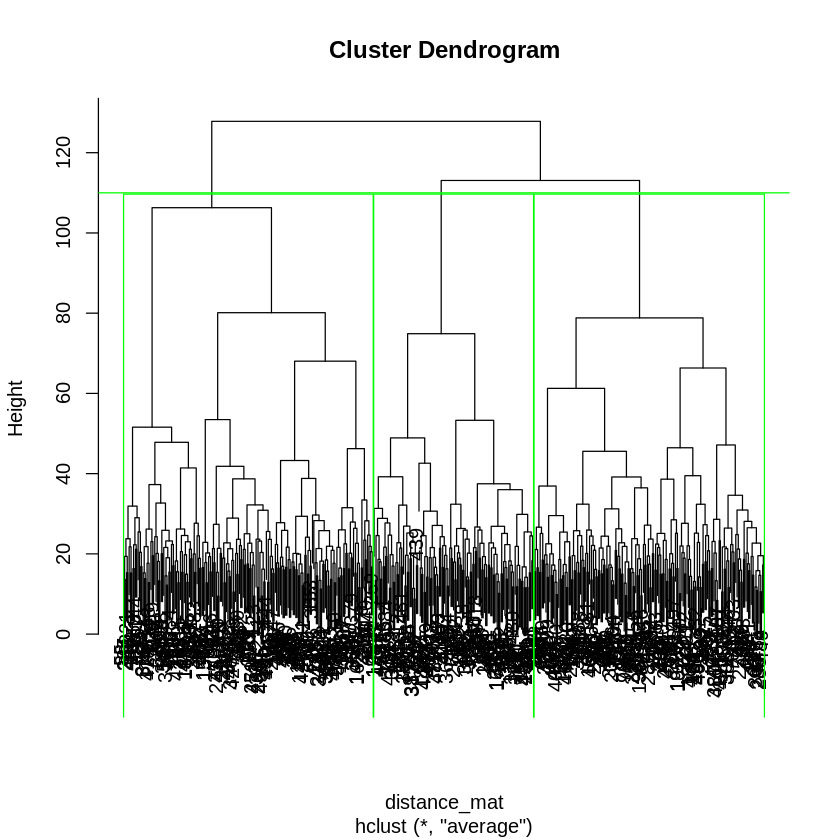

In [8]:
# Finding distance matrix
distance_mat <- dist(random_dataset, method = 'euclidean')
distance_mat

# Fitting Hierarchical clustering Model
# to training dataset
set.seed(240) # Setting seed
Hierar_cl <- hclust(distance_mat, method = "average")
Hierar_cl

# Plotting dendrogram
plot(Hierar_cl)

# Choosing no. of clusters
# Cutting tree by height
abline(h = 110, col = "green")

# Cutting tree by no. of clusters
fit <- cutree(Hierar_cl, k = 3 )
fit

table(fit)
rect.hclust(Hierar_cl, k = 3, border = "green")


Q4. Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100,100]. 
Perform the following operations:

(i) Plot scatter graph between Column 5 and Column 6.

(ii) Plot histogram of each column in single graph.

(iii) Plot the Box plot of each column in single graph


In [ ]:
# Set the dimensions of the dataset
num_rows <- 600
num_cols <- 15

# Create a matrix of random values between -100 and 100
random_matrix <- matrix(runif(num_rows * num_cols, -100, 100), nrow = num_rows, ncol = num_cols)

# Convert the matrix to a data frame
random_dataset <- as.data.frame(random_matrix)

# Print the dataset
print(random_dataset)


             V1           V2          V3          V4          V5          V6
1    15.0175051 -10.76142457 -25.4291037 -70.3585888 -30.9261173   0.4634683
2    56.3844427  15.67768562 -99.9512998 -92.9823743  92.1485868   0.3961616
3   -81.2967717 -99.98796028   2.3975363 -37.6810428   4.0122964  -0.9162704
4   -62.1963414  16.12882712 -21.8236591  39.7381756 -11.2216094 -12.7335747
5   -95.4630231 -95.26197226  30.5179413  54.7162745 -69.7522974 -39.2332815
6   -52.6423300  -3.44918612 -19.1612137 -39.4371128  28.5363985  23.3811153
7   -81.2547238  80.70479208  76.8159571  30.3239846  58.3606895  37.4708486
8   -32.3753339  -4.43887175  -6.9417093 -79.2440871 -54.6358190   3.9748567
9    78.7437071 -99.63922221  -9.0426665 -86.2828277  47.2222497 -82.5921885
10  -25.0376876 -66.23825333  86.8884980 -76.4453925  63.4344549 -52.4456803
11  -73.7193711   7.80202020 -47.1343930 -47.1973781  80.1286927 -75.6084938
12  -90.1329073 -93.87541572  63.5742932   4.0612453  34.2703430 -57.6095296

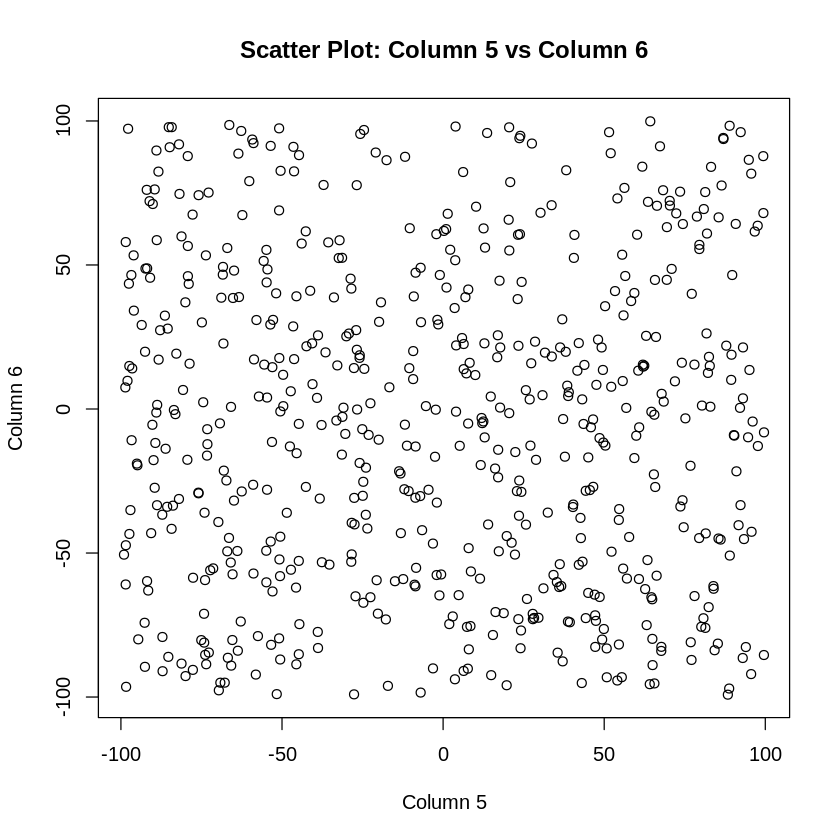

In [ ]:
# Plot scatter graph between Column 5 and Column 6
plot(random_dataset[, 5], random_dataset[, 6], xlab = "Column 5", ylab = "Column 6", main = "Scatter Plot: Column 5 vs Column 6")

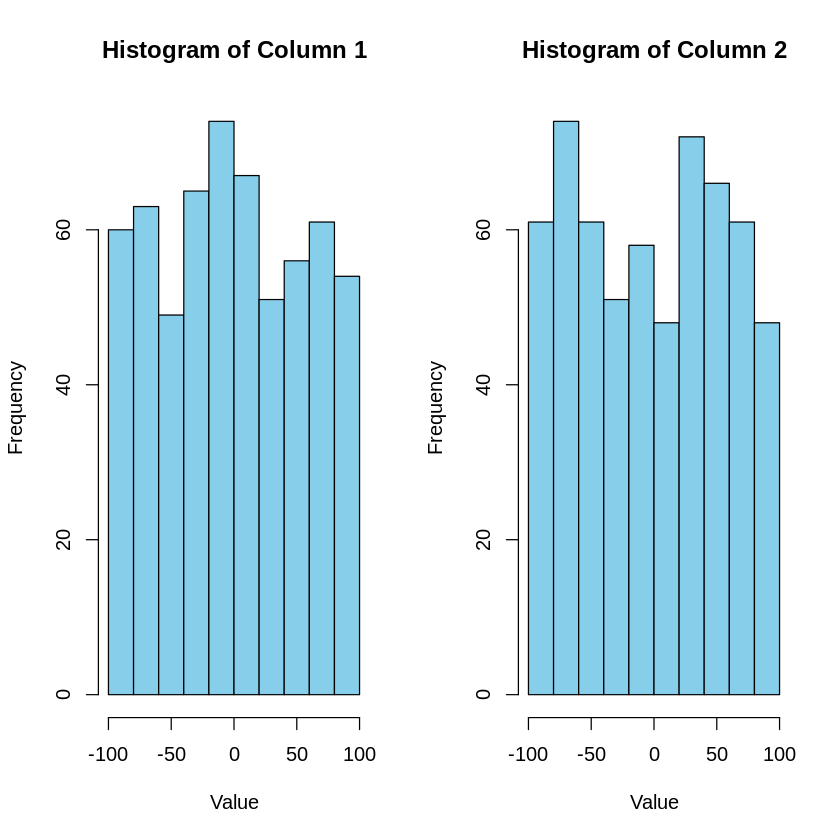

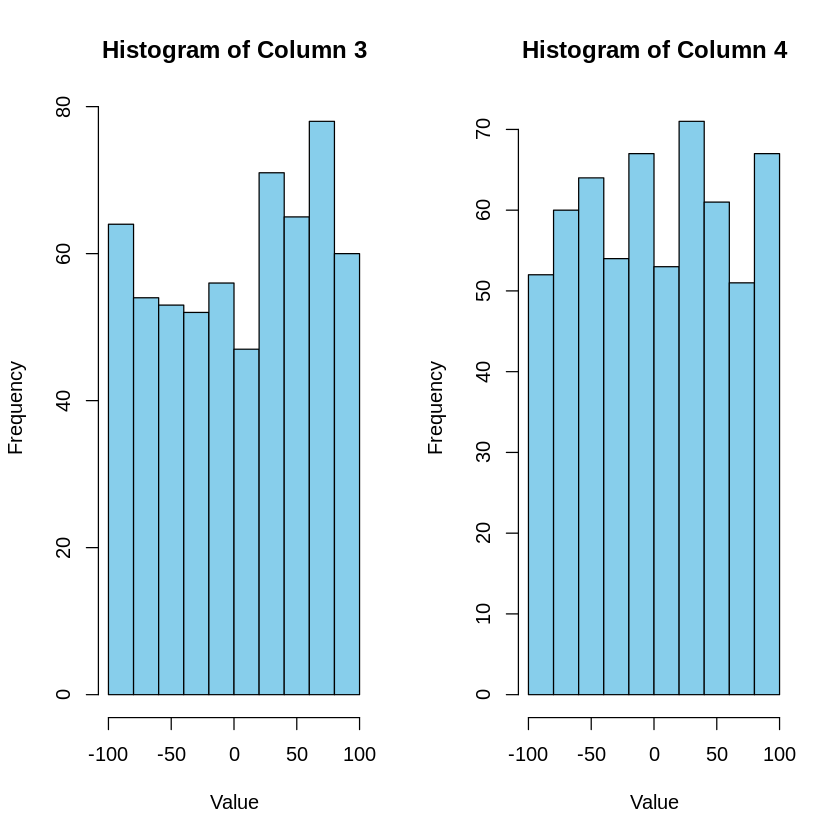

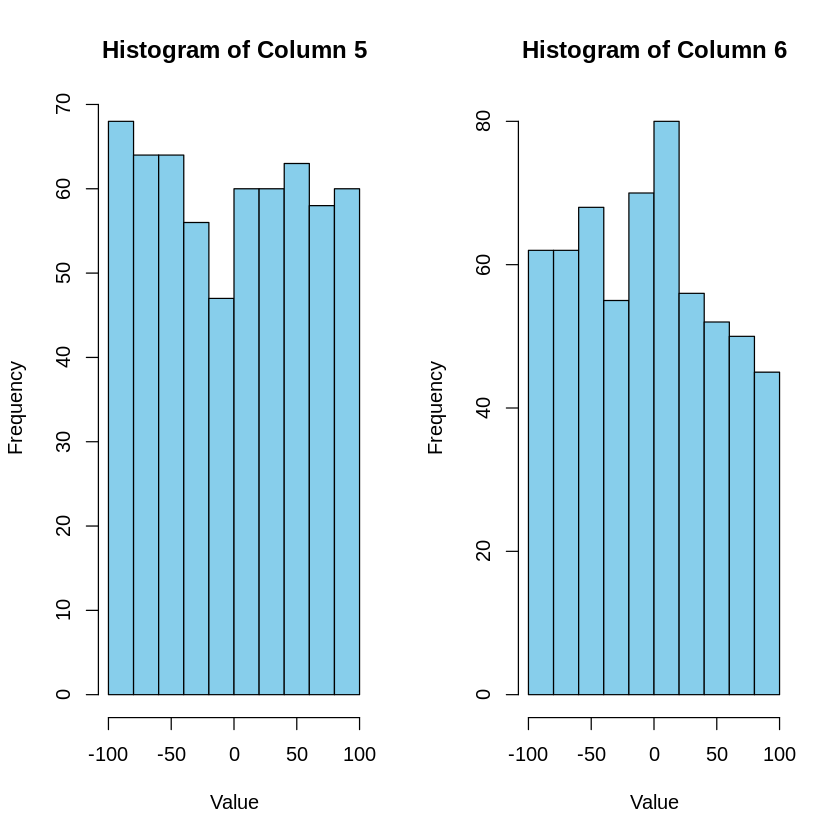

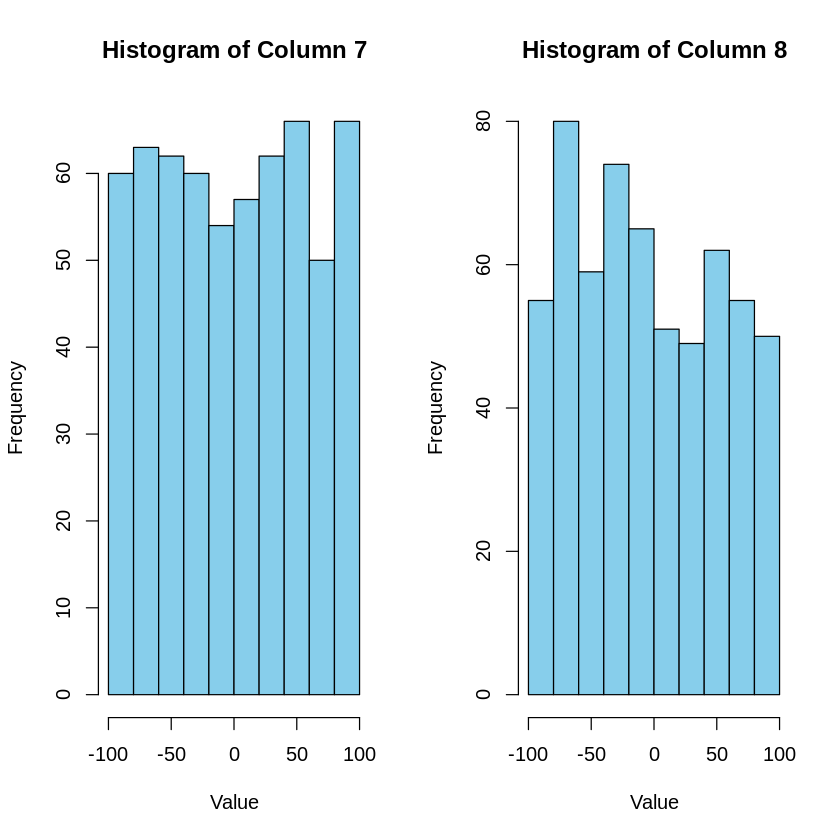

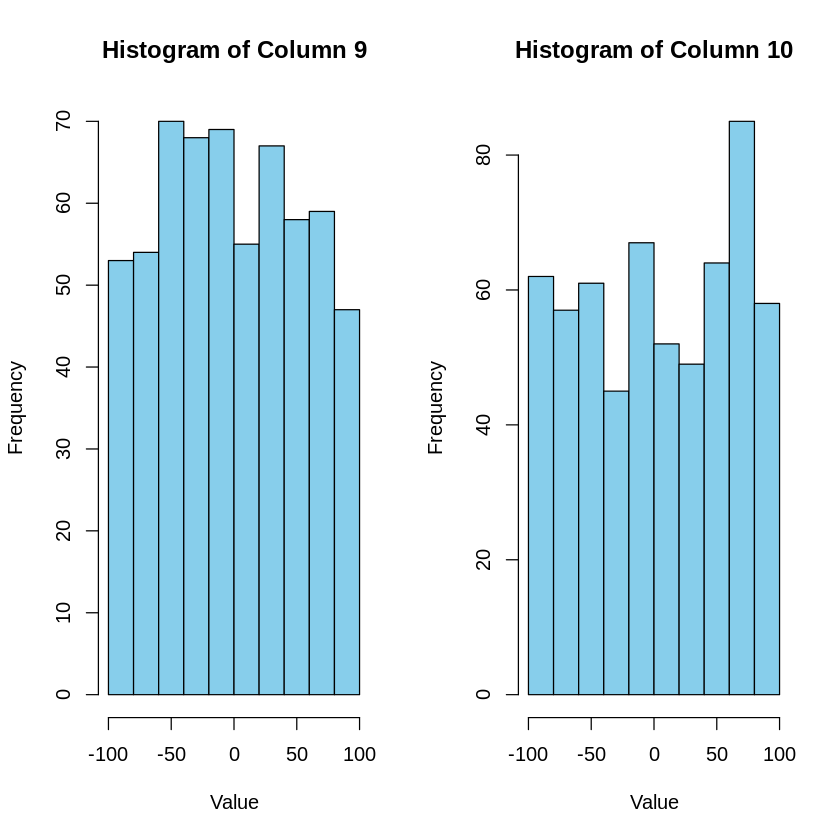

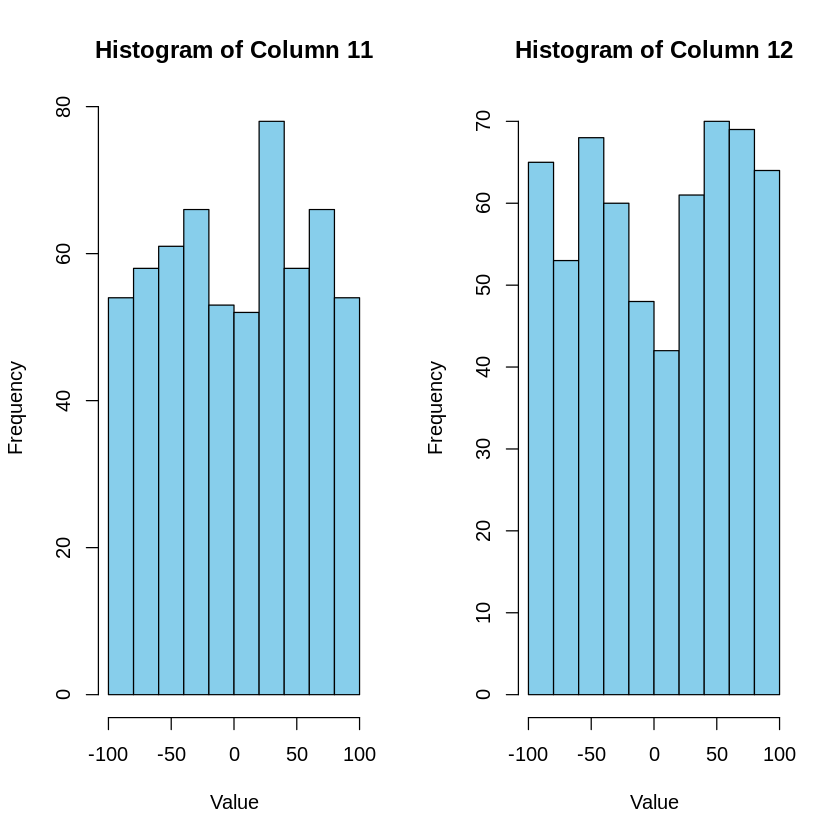

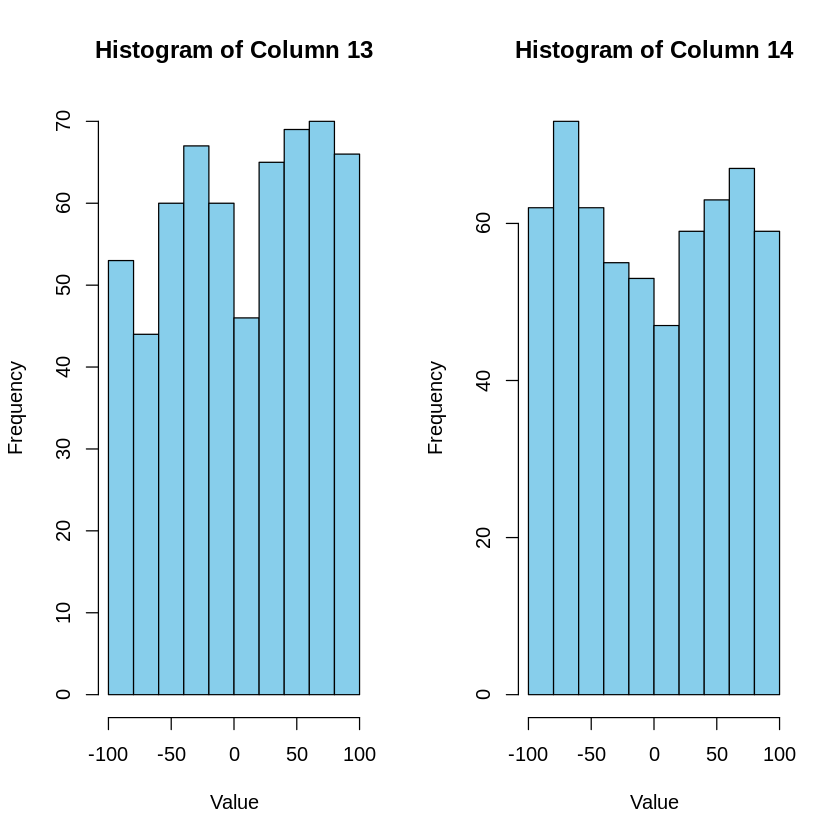

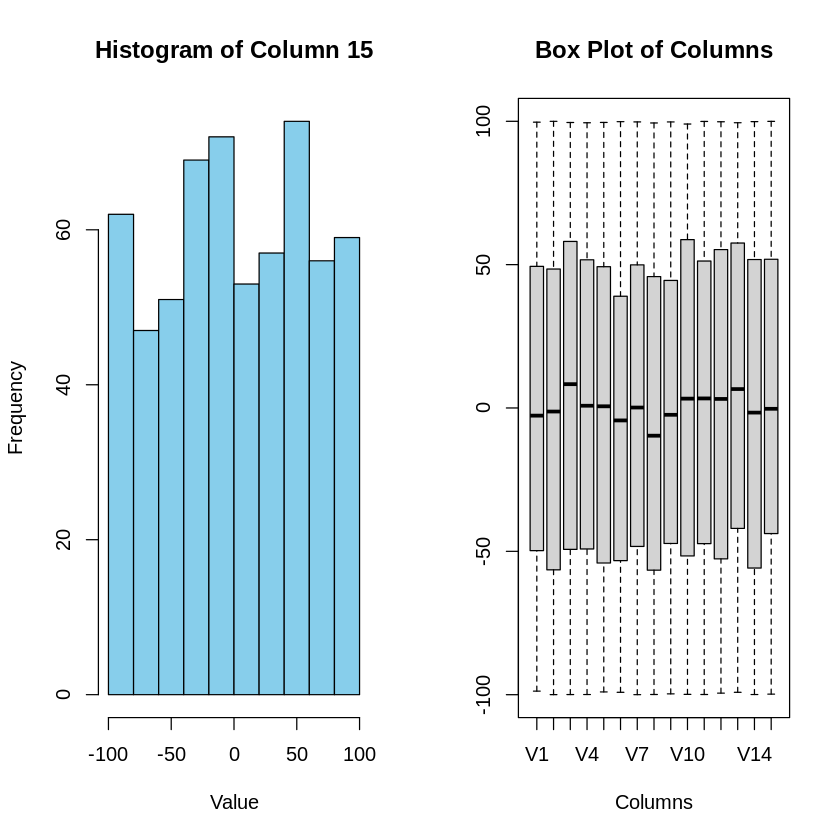

In [ ]:
# Set the layout for the histogram and box plot graphs
par(mfrow = c(1, 2))

# Plot histogram of each column in a single graph
hist_col <- function(col) {
  hist(col, main = paste("Histogram of Column", i), xlab = "Value", col = "skyblue")
}
for (i in 1:num_cols) {
  hist_col(random_dataset[, i])
}

# Plot box plot of each column in a single graph
boxplot(random_dataset, main = "Box Plot of Columns", xlab = "Columns")

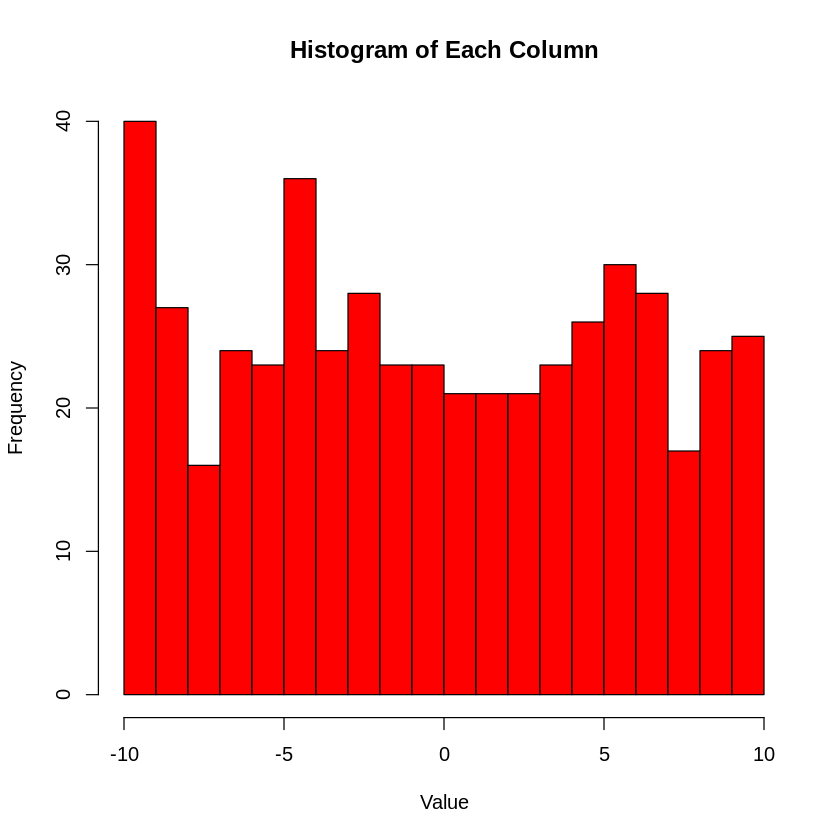

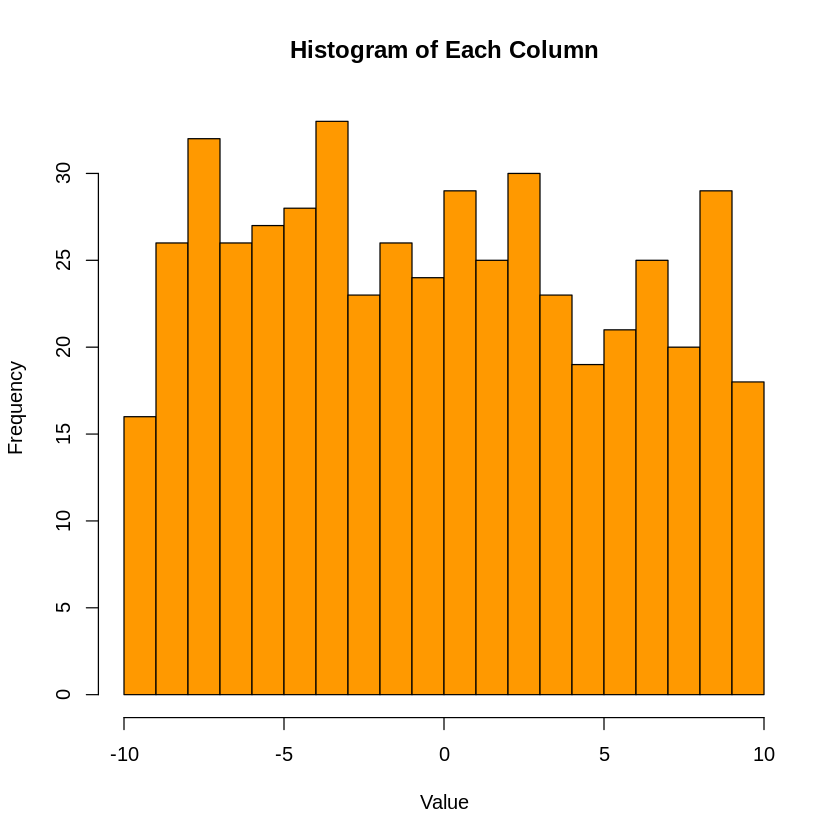

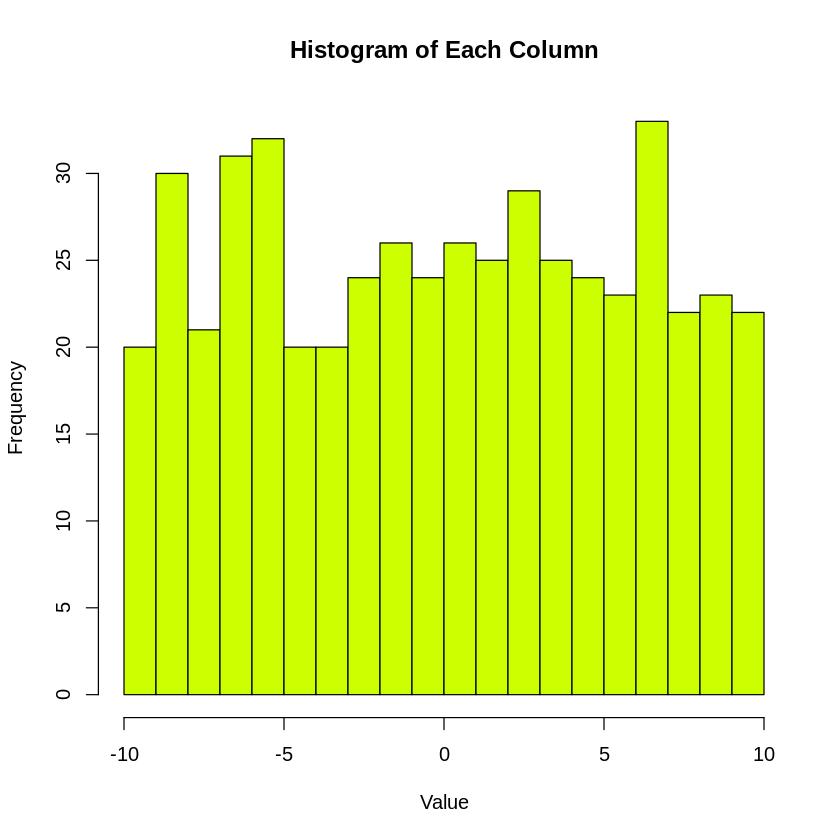

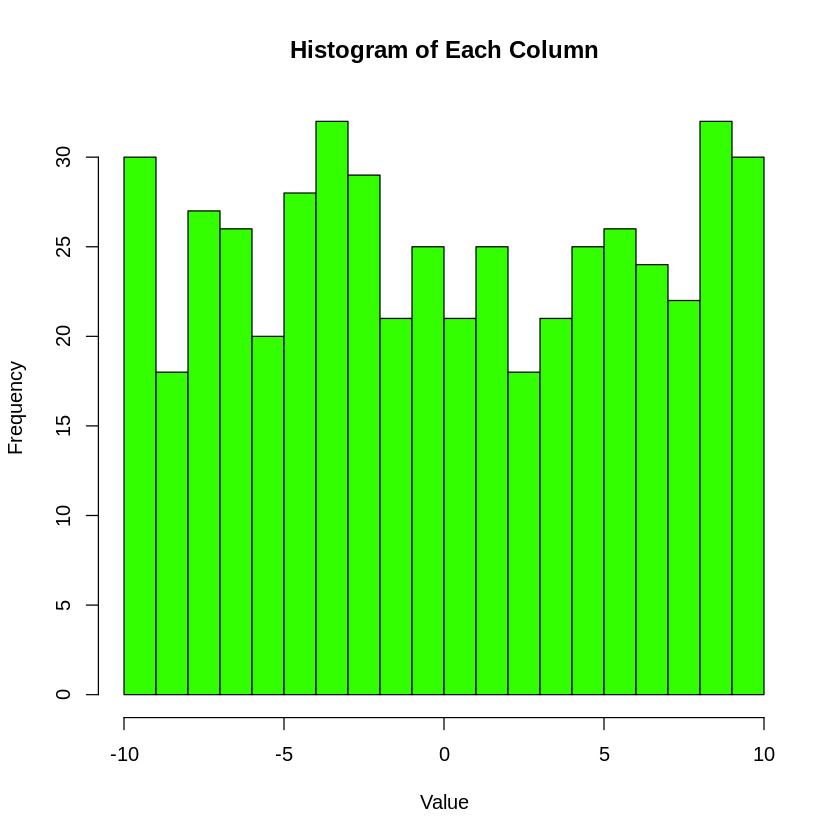

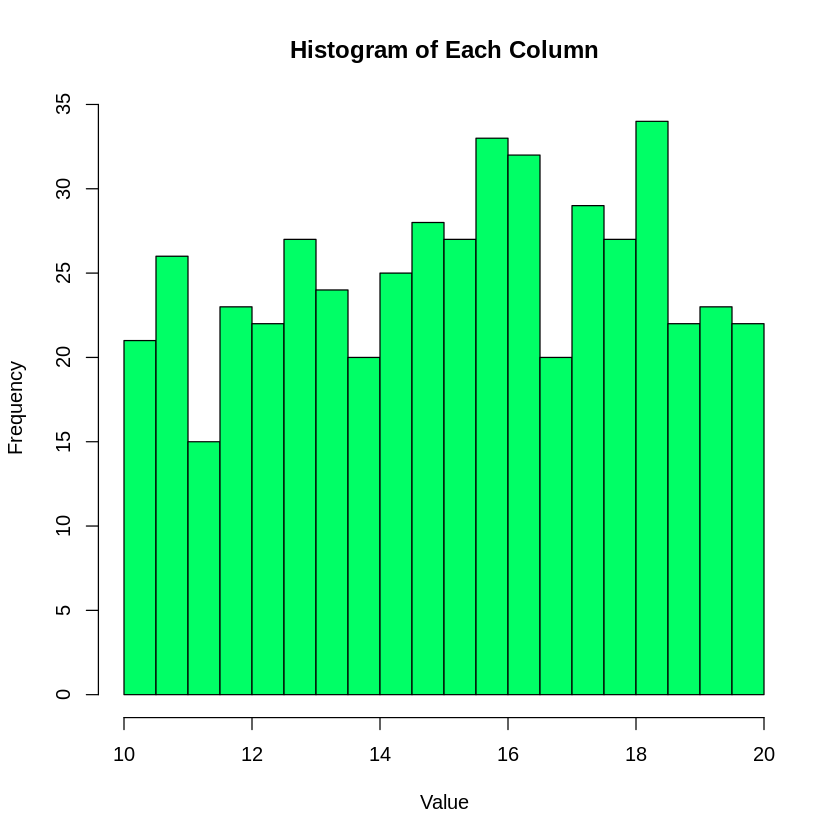

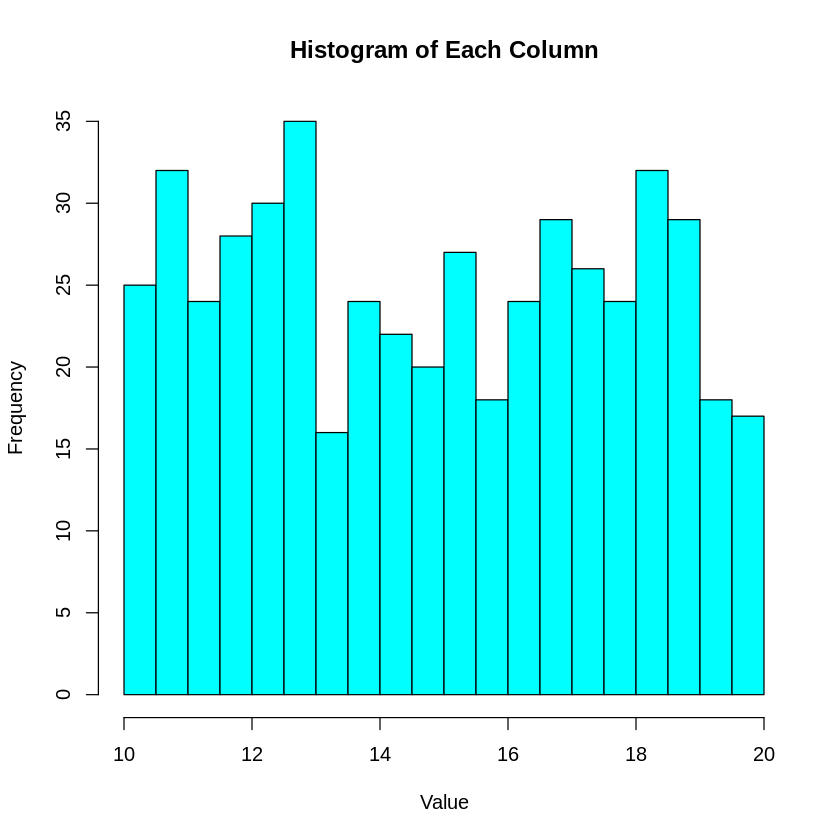

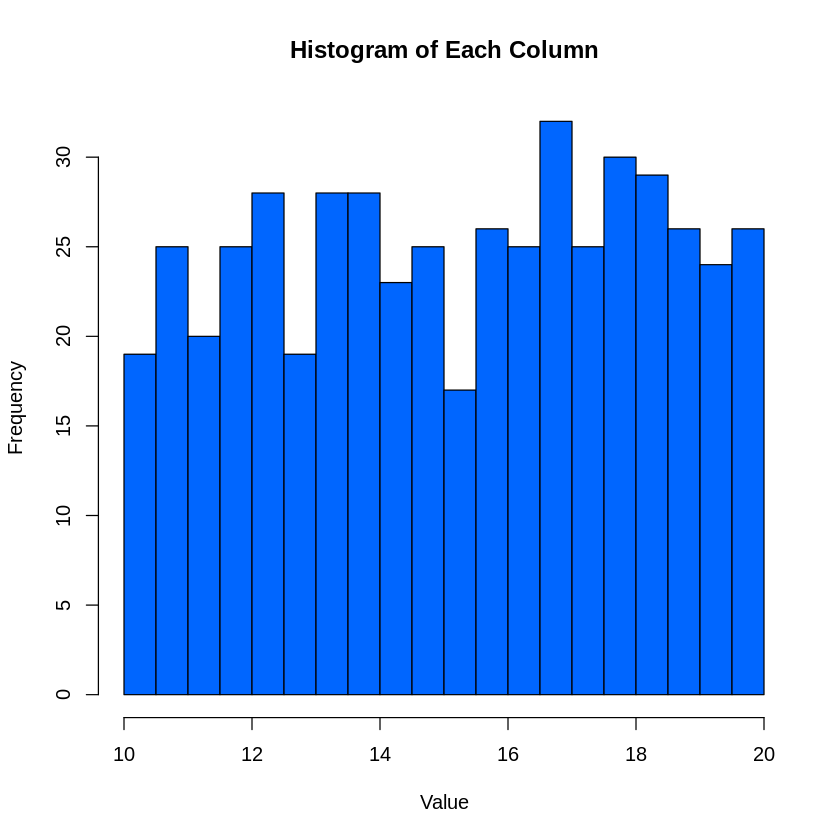

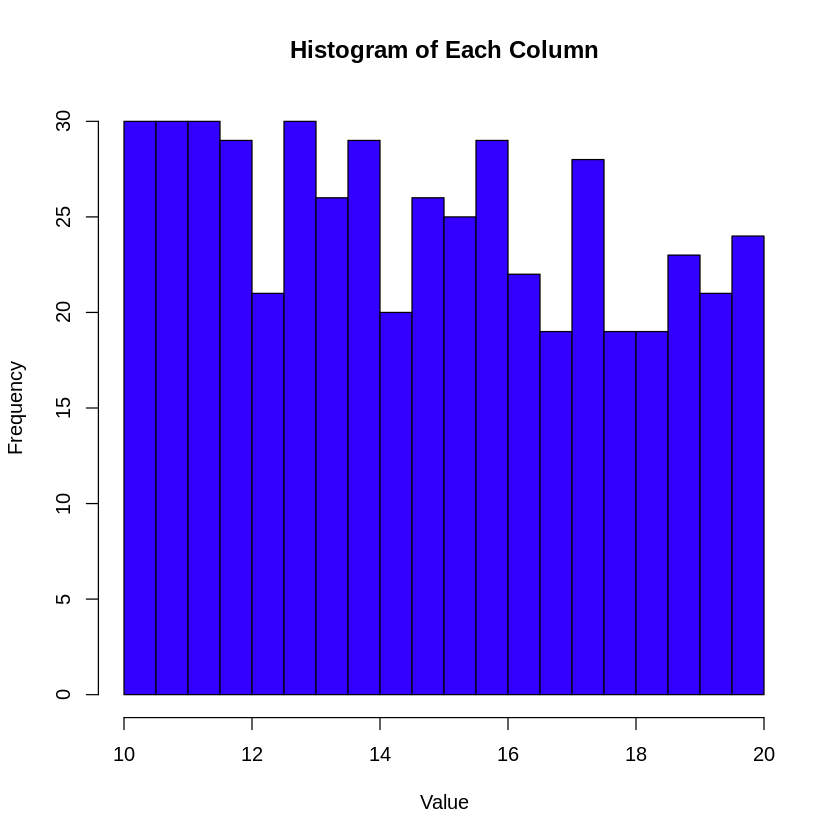

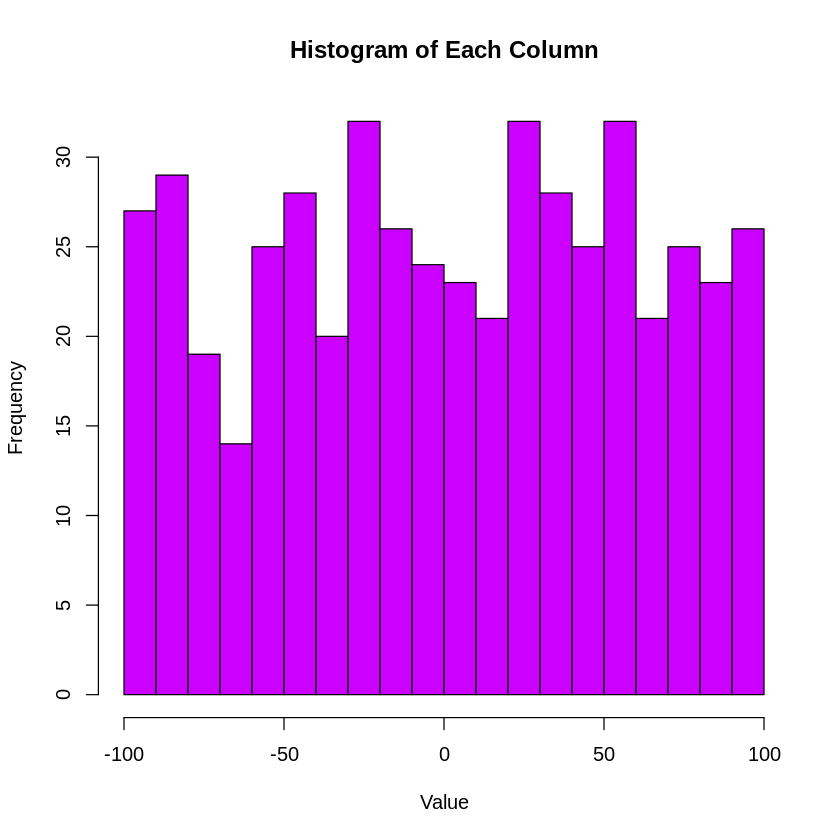

Loading required package: reshape2

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape2’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Loading required package: ggplot2

No id variables; using all as measure variables



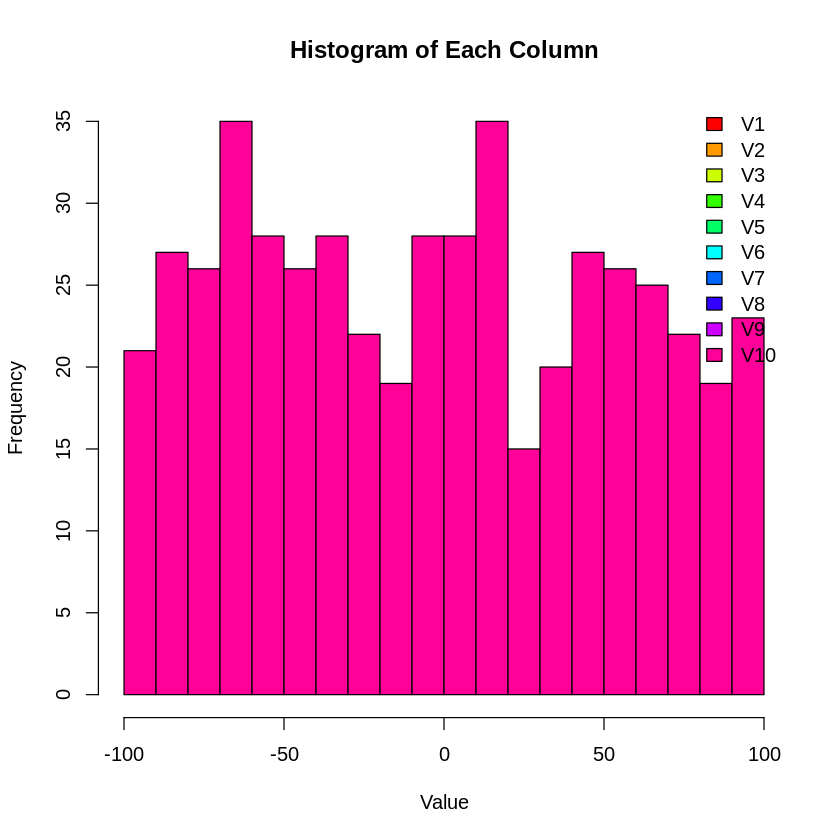

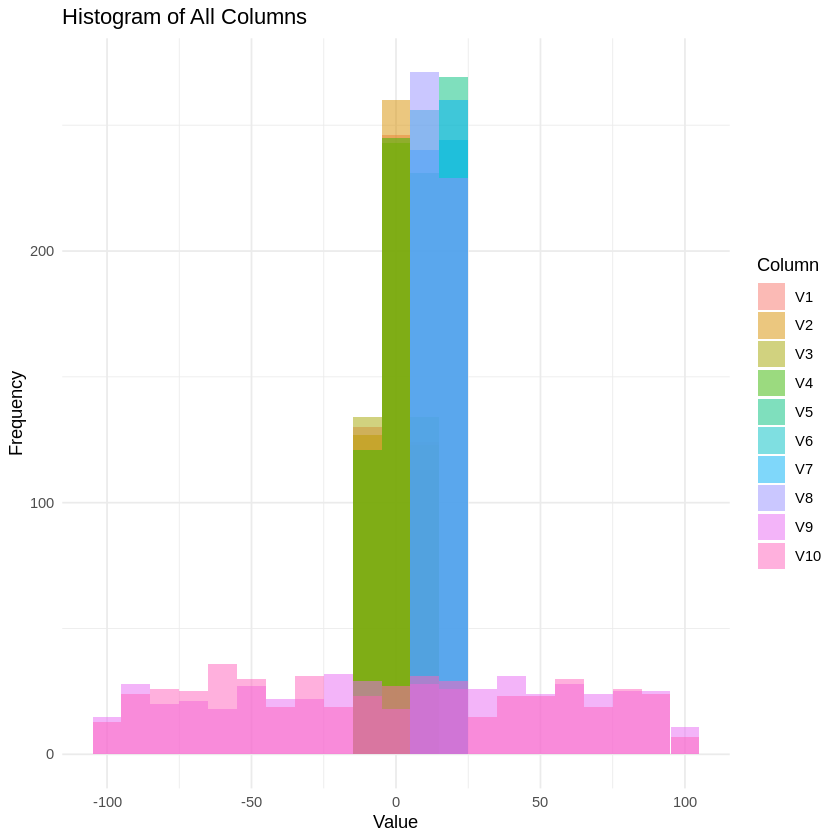

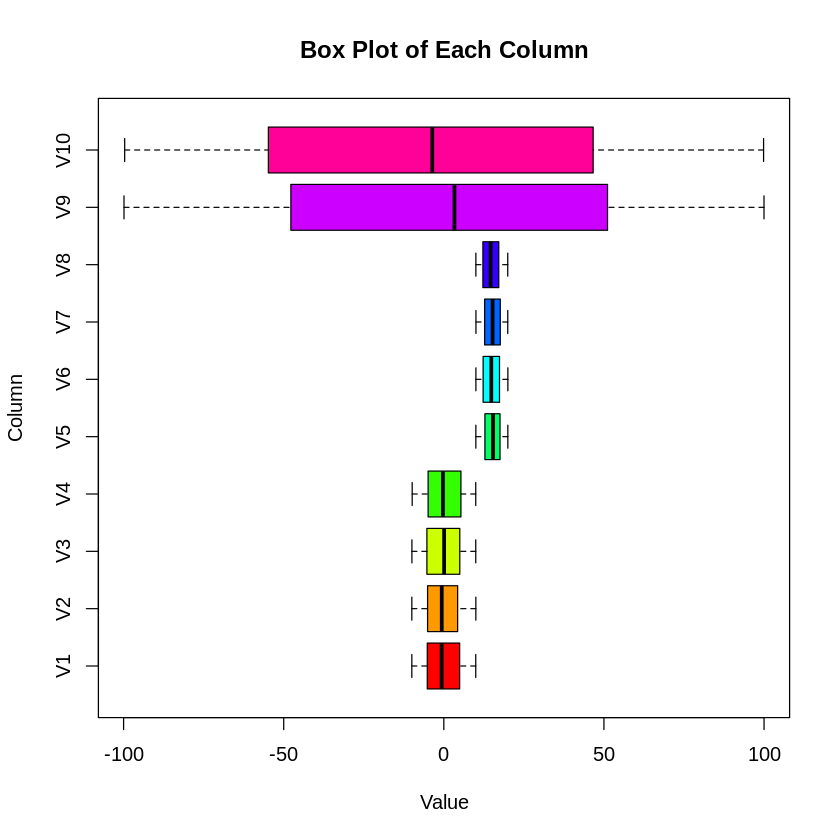

In [15]:
# Plot histogram of each column in a single graph
par(mfrow = c(1, 1))
hist_colors <- rainbow(ncol(random_dataset))
for (i in 1:ncol(random_dataset)) {
  hist(random_dataset[, i], breaks = 20, col = hist_colors[i], 
       main = "Histogram of Each Column", xlab = "Value", ylab = "Frequency")
}
legend("topright", legend = colnames(random_dataset), fill = hist_colors, bty = "n")

# Install required packages if not already installed
if (!require(reshape2)) {
  install.packages("reshape2")
}
if (!require(ggplot2)) {
  install.packages("ggplot2")
}

library(reshape2)
library(ggplot2)

# Reshape the data frame
melted_data <- melt(random_dataset)

# Plot histogram of all columns in a single graph
ggplot(melted_data, aes(value, fill = variable)) +
  geom_histogram(binwidth = 10, position = "identity", alpha = 0.5) +
  labs(x = "Value", y = "Frequency", title = "Histogram of All Columns") +
  theme_minimal() +
  scale_fill_discrete(name = "Column")

# Plot box plot of each column in a single graph
par(mfrow = c(1, 1))
boxplot(random_dataset, horizontal = TRUE, col = rainbow(ncol(random_dataset)),
        main = "Box Plot of Each Column", xlab = "Value", ylab = "Column")

Q5. Create a random dataset of 500 rows and 5 columns:
All the values are defined between [5,10]. 
Perform the following operations:

(i) Perform t-Test on each column.

(ii) Perform Wilcoxon Signed Rank Test on each column.

(iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4

In [ ]:
# Set the dimensions of the dataset
num_rows <- 500
num_cols <- 5

# Create a matrix of random values between 5 and 10
random_matrix <- matrix(runif(num_rows * num_cols, 5, 10), nrow = num_rows, ncol = num_cols)

# Convert the matrix to a data frame
random_dataset <- as.data.frame(random_matrix)

# Print the dataset
print(random_dataset)


          V1       V2       V3       V4       V5
1   9.412222 5.386799 5.237560 8.074795 7.383778
2   9.609014 6.183358 5.242923 9.069271 7.458045
3   5.727434 6.399104 7.393036 9.228819 5.515044
4   6.871183 5.769866 5.357603 7.876222 6.293233
5   5.149706 9.231120 7.645324 8.404819 9.746251
6   8.409951 9.783683 9.036612 9.980840 8.768508
7   5.456892 6.734244 5.728335 7.451979 6.278848
8   5.622453 6.386596 5.523201 8.324543 6.297737
9   9.433776 7.337546 9.714060 7.389743 5.862520
10  8.288197 8.132654 7.502881 5.002436 8.790718
11  9.218344 7.091282 6.345297 8.907942 5.121095
12  8.462213 9.473851 9.501968 8.564106 9.277176
13  9.904922 7.136715 8.480315 7.900812 5.371858
14  7.779447 9.626692 6.972104 7.673950 8.421223
15  7.265868 9.616142 9.216803 6.658121 5.616503
16  7.741134 5.488480 7.148135 9.270071 5.328864
17  6.631707 9.868179 9.849776 8.781707 7.227339
18  9.111681 8.716084 6.769804 7.967892 9.978486
19  9.221200 5.699799 8.455421 6.790932 9.635803
20  9.161086 8.57549

In [ ]:
# Perform t-test on each column
t_test_results <- lapply(random_dataset, function(col) {
  t.test(col)
})

# Print t-test results
print(t_test_results)

$V1

	One Sample t-test

data:  col
t = 113.01, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.336292 7.595898
sample estimates:
mean of x 
 7.466095 


$V2

	One Sample t-test

data:  col
t = 115.56, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.303468 7.556118
sample estimates:
mean of x 
 7.429793 


$V3

	One Sample t-test

data:  col
t = 115.16, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.375794 7.631838
sample estimates:
mean of x 
 7.503816 


$V4

	One Sample t-test

data:  col
t = 115.6, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.396152 7.651909
sample estimates:
mean of x 
 7.524031 


$V5

	One Sample t-test

data:  col
t = 113.51, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not 

In [ ]:
# Assuming random_dataset is your dataset, replace it with your own dataset
# random_dataset <- your_dataset

# Perform Wilcoxon Signed Rank Test on each column
wilcox_test_results <- lapply(random_dataset, function(col) {
  wilcox.test(col, mu = median(col))
})

# Print Wilcoxon Signed Rank Test results
print(wilcox_test_results)

# Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4
column3 <- random_dataset[, 3]
column4 <- random_dataset[, 4]

# Two Sample t-Test
t_test_result <- t.test(column3, column4)
print(t_test_result)

# Wilcoxon Rank Sum Test
wilcox_test_result <- wilcox.test(column3, column4)
print(wilcox_test_result)


$V1

	Wilcoxon signed rank test with continuity correction

data:  col
V = 65690, p-value = 0.343
alternative hypothesis: true location is not equal to 7.402033


$V2

	Wilcoxon signed rank test with continuity correction

data:  col
V = 63324, p-value = 0.829
alternative hypothesis: true location is not equal to 7.41399


$V3

	Wilcoxon signed rank test with continuity correction

data:  col
V = 63530, p-value = 0.7797
alternative hypothesis: true location is not equal to 7.485255


$V4

	Wilcoxon signed rank test with continuity correction

data:  col
V = 60478, p-value = 0.5065
alternative hypothesis: true location is not equal to 7.569109


$V5

	Wilcoxon signed rank test with continuity correction

data:  col
V = 61426, p-value = 0.7107
alternative hypothesis: true location is not equal to 7.593758



	Welch Two Sample t-test

data:  column3 and column4
t = -0.21949, df = 998, p-value = 0.8263
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence